# Project - Feature Selection
 In This notebook we will explain the main steps that brought us to our finalmodel 

In [1]:
import dataset.dataset as d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline



df = d.read_imputed_onehot_dataset()
#df['Date'] = df['Date'].astype("datetime64[s]")
#df['day_of_week'] = df['Date'].dt.weekday_name
#df_sales_per_day = df.groupby(df["day_of_week"])['NumberOfSales'].agg('sum')

df = df.loc[:, df.columns != 'Date']

df.head()

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Events_Fog,Events_Thunderstorm,Events_Hail,StoreType_Hyper Market,StoreType_Super Market,StoreType_Standard Market,StoreType_Shopping Center,AssortmentType_General,AssortmentType_With Non-Food Department,AssortmentType_With Fish Department
0,1000,0,1,0,326,7,495,5676,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000,0,1,0,326,7,608,8111,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000,0,1,0,326,7,665,8300,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000,0,1,0,326,7,630,7154,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000,0,0,0,326,7,0,0,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In this section we split the variables in order to perform feature selection 

In [2]:

dataset_to_PCA = df.loc[:, df.columns != 'NumberOfSales']
dataset_to_PCA = dataset_to_PCA.loc[:, dataset_to_PCA.columns != 'NumberOfCustomers']

X = np.array(dataset_to_PCA)
feature_names = np.array(dataset_to_PCA.columns)

target = df['NumberOfCustomers']
y = np.array(target)



Calcoliamo come baseline una linear regression p

In [ ]:
kfolds = KFold(3,shuffle=True,random_state=1234)
model = linear_model.LinearRegression()

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

scores = cross_val_score(model, X_, y, cv=kfolds)
scores.mean()

In [4]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X)

print("Reduced data set shape is ", X_selected_features_variance.shape)

mask = feature_selection_variance_model.get_support() #list of booleans
print("Selected features = ", feature_names[mask])
#tutto molto bello ma riduce solo da 44 features a 34 non ci piace


Reduced data set shape is  (523021, 34)
Selected features =  ['StoreID' 'HasPromotions' 'NearestCompetitor' 'Region' 'Region_AreaKM2'
 'Region_GDP' 'Region_PopulationK' 'CloudCover' 'Max_Dew_PointC'
 'Max_Humidity' 'Max_Sea_Level_PressurehPa' 'Max_TemperatureC'
 'Max_VisibilityKm' 'Max_Wind_SpeedKm_h' 'Mean_Dew_PointC' 'Mean_Humidity'
 'Mean_Sea_Level_PressurehPa' 'Mean_TemperatureC' 'Mean_VisibilityKm'
 'Mean_Wind_SpeedKm_h' 'Min_Dew_PointC' 'Min_Humidity'
 'Min_Sea_Level_PressurehPa' 'Min_TemperatureC' 'Min_VisibilitykM'
 'Precipitationmm' 'WindDirDegrees' 'Events_Rain' 'Events_none'
 'Events_Fog' 'StoreType_Hyper Market' 'StoreType_Standard Market'
 'AssortmentType_General' 'AssortmentType_With Non-Food Department']


In [5]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

feature_selection_univariate_model = SelectKBest(mutual_info_regression, k=4)
X_selected_features_univariate = feature_selection_univariate_model.fit_transform(X,y)
print("Reduced data set shape is ",X_selected_features_univariate.shape)

mask = feature_selection_univariate_model.get_support() #list of booleans
print("Selected features = ",feature_names[mask])
'''

'\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import mutual_info_regression\n\nfeature_selection_univariate_model = SelectKBest(mutual_info_regression, k=4)\nX_selected_features_univariate = feature_selection_univariate_model.fit_transform(X,y)\nprint("Reduced data set shape is ",X_selected_features_univariate.shape)\n\nmask = feature_selection_univariate_model.get_support() #list of booleans\nprint("Selected features = ",feature_names[mask])\n'

## Principal Component Analysis
We now apply principal component analysis. Since we need to decide how many component to select and for this purpose we apply PCA and plot the explained variance ratio and the cumulative explained variance.

In [9]:
full_pca_model = PCA()
full_fitted_model = full_pca_model.fit(X)

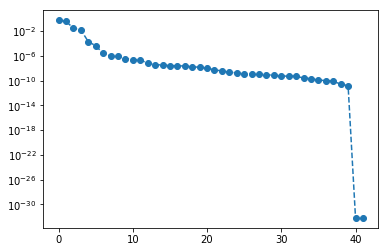

In [10]:
plt.semilogy(full_fitted_model.explained_variance_ratio_, '--o');


Text(0,0.5,'Cumulative Explained Variance Ratio')

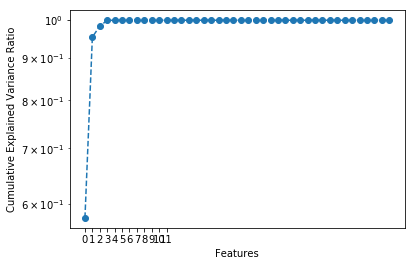

In [11]:
plt.semilogy(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,12,1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

Da qui vediamo quante componenti spiegano la varianza del modello, fatto questo passo passiamo a selezionare esclusivamente quel numero di componenti. 

In [23]:
feature_selection_pca_model = PCA(n_components=4)
fitted_model = feature_selection_pca_model.fit(X)

X_selected_features_pca = fitted_model.transform(X)

print("Explained Variance: %s" % fitted_model.explained_variance_ratio_)
print("Reduced data set shape is ", X_selected_features_pca.shape)

print(X_selected_features_pca)

Explained Variance: [0.57668856 0.37758961 0.02952688 0.01594658]
Reduced data set shape is  (523021, 4)
[[-7587.07479214 -3166.81143236  2327.84507026  2022.80384621]
 [-7587.09917229 -3166.80847522  2328.02415906  2022.69668971]
 [-7587.07561179 -3166.82498728  2327.85999935  2022.75004176]
 ...
 [-3329.35866653 -2826.90275792  2602.26233849  1962.5713456 ]
 [-3329.36915969 -2826.91318784  2602.34937855  1962.48529323]
 [-3329.37773427 -2826.90987495  2602.40855015  1962.46100346]]


In [24]:
kfolds = KFold(3,shuffle=True,random_state=1234)
model = linear_model.LinearRegression()

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

scores = cross_val_score(model, X_, y, cv=kfolds)
scores.mean()

0.644140940916056

## Random Forest
We now apply a random forest and use its scoring to select the attributes


In [ ]:
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X, y)


In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], data.feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), data.feature_names[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
feature_selection_model = SelectFromModel(forest, prefit=True)
X_selected_features_forest = feature_selection_model.transform(X)
X_selected_features_forest.shape